In [1]:
%load_ext autoreload
%autoreload 2
import models
import utils
import torch
import PIL
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
#Create encoder with GLoVE vectors loaded in. We then turn a string into an embedding.
encoder_decoder = models.StegEncoderDecoder( embedding_path='./embeddings',
                                    encoder_path = 'weights/embedding_20_word_encoder_upsample.pth.tar', 
                                    decoder_path = 'weights/embedding_20_word_decoder_upsample.pth.tar',
                                    device=device)
labels = encoder_decoder.message_2_labels('i like cheese')
embeddings = encoder_decoder.label_2_embeddings(torch.LongTensor(labels))
print(embeddings[0])

tensor([-0.2815,  0.1935,  1.1641, -0.4653,  0.6921,  0.2288, -0.4857, -0.1230,
        -0.6392, -0.0156, -0.6631, -0.3146,  0.0022,  0.4199,  0.7196, -0.2605,
         0.3154, -0.9087,  0.0143, -0.7649, -0.0549, -0.0631,  0.2145,  0.1604,
        -0.0537, -0.5038, -0.5571,  0.8787,  0.3443, -1.4202,  1.3326, -0.5367,
        -0.3545, -0.2663, -0.5560,  0.7895,  0.9229, -0.0330,  0.2244, -0.6045,
         1.5298,  0.4501, -0.1925,  0.2621, -0.9433, -0.2826,  0.1968,  0.2010,
         0.1161, -0.3629])


In [3]:
#Next we load in a pretrained Unet that hides the message.
hider = models.Hnet(Hnet_path ='weights/netH.pth.tar', device=device)

In [4]:
#Load in the image we want to use as a cover.
cover_image = utils.image_loader('mousetrap.png')

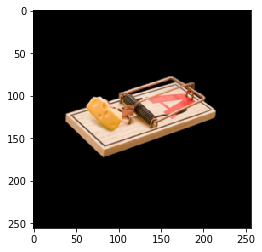

In [5]:
utils.imshow(cover_image[0].detach().cpu())

/usr/local/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


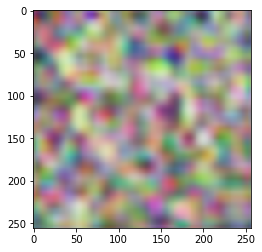

In [6]:
#A look at what the encoded message looks like, we combine this with the cover above.
encoded = encoder_decoder.encoder(embeddings.to(device))
utils.imshow(encoded[0].detach().cpu())

In [7]:
#Use hider to hide our embedding in the cover
cover, message_image, covered_img = hider.hide_message(encoder_decoder.encoder, embeddings, cover_image, device=device)

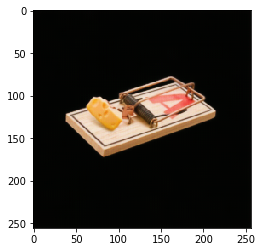

In [8]:
utils.imshow(covered_img[0].detach().cpu())

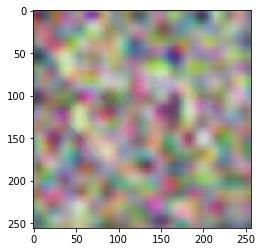

In [9]:
#Reveal the hidden encoding
revealer = models.Rnet(Rnet_path ='weights/netR.pth.tar', device=device)
revealed_encoding = revealer.model(covered_img[0].unsqueeze(0))
utils.imshow(revealed_encoding[0].detach().cpu())

In [11]:
#Finally, recover the message
revealed_message = revealer.recover_message(revealer.model, encoder_decoder, covered_img, device=device)
print(revealed_message)

    i      like     cheese    
